- Build a linear models of degree 2 to estimate $v_l$ <br>
- Use 4 samples of train data for training and  <br>
- Use gradient descent method for finding the weights. <br>
- Update the weights for each sample. <br>
- Do weight updates for 100 epochs. (use train data only) <br>
- Report the values predicted on the 3 samples of test data in the variable Y_pred_test (shape is (3,))

- Hint : Take inputs in units of metres (0.6, 0.5, 0.3, 0.2)


### Train Data
| Sonar S | $v_l$   |$v_r$|
|---------|---------|-----|
|60cm |10cm/sec |10cm/sec |
| 50cm |9cm/sec| 9cm/sec |
| 30cm | 7cm/sec | 4cm/sec |
|20cm | 4cm/sec | 0cm/sec|

### Test Data
| Sonar S | $v_l$   |$v_r$|
|---------|---------|-----|
|40cm |8cm/sec |8cm/sec |
| 35cm |7.5cm/sec| 6cm/sec |
| 25cm | 6cm/sec | 2cm/sec |

In [0]:
train_s=np.array([0.6,0.5,0.3,0.2])
train_v=np.array([0.1,0.09,0.07,0.04])
test_s=np.array([0.4,0.35,0.25])
test_v=np.array([0.08,0.075,0.06])

In [0]:
import numpy as np


In [14]:
def createA(x, D):
 
    h=[]
    t=[]
    
    #print(A)
    
    print(x)
    
                               
    for i in x:
      for k in range(D+1):
        t.append(i**k)
        
      h.append(t)
      t=[]
      
    A=np.array(h) 
    #print(A)
    return A
createA(train_s,2)

[0.6 0.5 0.3 0.2]


array([[1.  , 0.6 , 0.36],
       [1.  , 0.5 , 0.25],
       [1.  , 0.3 , 0.09],
       [1.  , 0.2 , 0.04]])

In [16]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    
    w=(2*np.random.rand(A.shape[1],)-1)/2
    print(w)
    return w
A=createA(train_s,2)
w=train_w(A,train_v)

[0.6 0.5 0.3 0.2]
[0.41336917 0.16988492 0.00579491]


array([0.41336917, 0.16988492, 0.00579491])

In [21]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    # YOUR CODE HERE
    
    shape1=w.shape
    D=shape1[0]-1
    shape2=x.shape
    N=shape2[0]
    A=createA(x,D)
    y=np.empty((N,))
    y=np.dot(A,w)
    print(y)
    return y
A=createA(test_s,2)
w=train_w(A,train_v)
yd=predict_y(w,test_s)


[0.4  0.35 0.25]
[0.44171544 0.1882158  0.36622261]
[0.4  0.35 0.25]
[0.57559738 0.55245324 0.5116583 ]


In [22]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    error_matrix=(y-yd)**2
    mse=sum(error_matrix)/2
    
    return mse
y=test_v
compute_mse(y,yd)
  

0.3387867860684844

In [0]:
import matplotlib.pyplot as plt

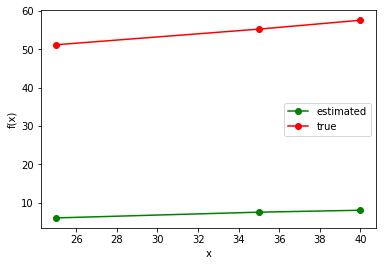

In [28]:
def plotModel(x, y, yd):
    
    i = x.argsort()
    plt.figure()
    plt.plot(x[i]*100,y[i]*100,'g-o')
    plt.plot(x[i]*100,yd[i]*100,'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])
plotModel(test_s,y,yd)